In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats

import pyfstat
from pyfstat.helper_functions import get_sft_as_arrays

from IPython.display import Image, display

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 20

In [2]:
# Setup Writer
writer_kwargs ={"label": "single_detector_gaussian_noise",
                "outdir": "Pyfstat_example_data",
                "tstart": 1238166018,     # Starting time of the observating [GPS time]
                "duration": 120 * 86400,  # Duration [seconds]
                "detectors": "H1",        # Detector to simulate, in this case LIGO Hanford
                "sqrtSX": 1e-23,          # Single-sided Amplitude Spectral Density of the noise
                "Tsft": 1800,             # Fourier transform time duration
                "SFTWindowType": "tukey", # Window function to compute short Fourier transforms
                "SFTWindowBeta": 0.01,    # Parameter associated to the window function
               }

signal_parameters = {
    "F0": 100.,
    "F1": -1e-9,
    "Alpha": 0.5,
    "Delta": 0.,
    "h0": .5e-23,
    "cosi": 1,
    "psi": 0.,
    "phi": 0.
}

writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
writer.make_data()
frequency, timestamps, fourier_data = get_sft_as_arrays(writer.sftfilepath)

16:12 INFO    : Creating Writer object...
16:12 INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
16:12 INFO    : Generating SFTs with fmin=99.94626054834502, Band=0.09711200177594789
16:12 INFO    : Checking if we can re-use injection config file...
16:12 INFO    : ...OK: config file Pyfstat_example_data/single_detector_gaussian_noise.cff already exists.
16:12 INFO    : ...file contents unmatched, updating Pyfstat_example_data/single_detector_gaussian_noise.cff.
16:12 INFO    : Writing config file: Pyfstat_example_data/single_detector_gaussian_noise.cff
16:12 INFO    : Checking if we can re-use existing SFT data file(s)...
16:12 INFO    : ...OK: file(s) found matching 'Pyfstat_example_data/H-5760_H1_1800SFT_single_detector_gaussian_noise-1238166018-10368000.sft'.
16:12 INFO    : ...the config file 'Pyfstat_example_data/single_detector_gaussian_noise.cff' has been modifie

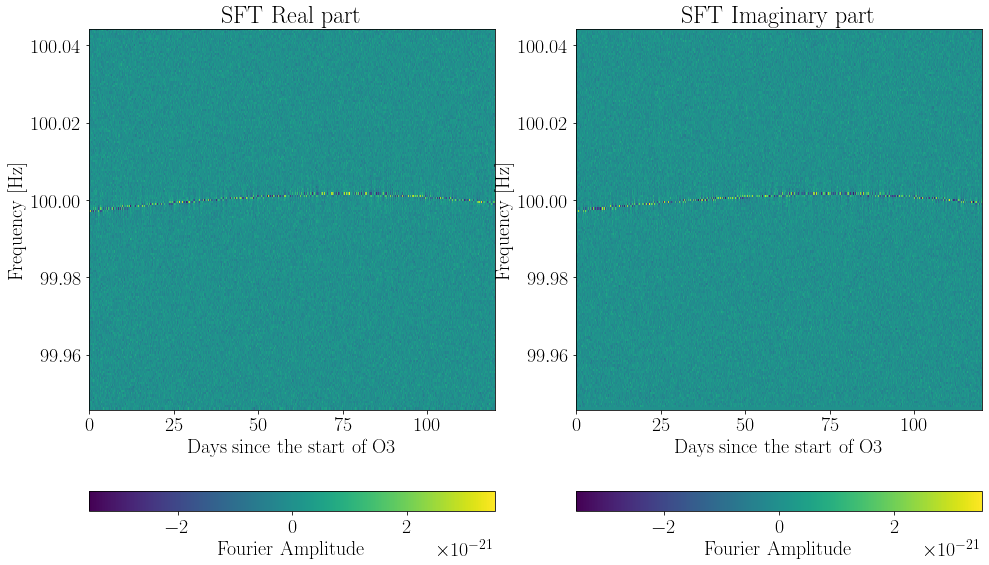

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

for ax in axs:
    ax.set(xlabel="Days since the start of O3", ylabel="Frequency [Hz]")

time_in_days = (timestamps["H1"] - timestamps["H1"][0]) / 86400

axs[0].set_title("SFT Real part")
c = axs[0].pcolormesh(time_in_days, frequency, fourier_data["H1"].real,
                      norm=colors.CenteredNorm())
fig.colorbar(c, ax=axs[0], orientation="horizontal", label="Fourier Amplitude")

axs[1].set_title("SFT Imaginary part")
c = axs[1].pcolormesh(time_in_days, frequency, fourier_data["H1"].imag,
                      norm=colors.CenteredNorm())

fig.colorbar(c, ax=axs[1], orientation="horizontal", label="Fourier Amplitude")

In [4]:
signal_parameters["h0"] = writer_kwargs["sqrtSX"] / 10.

writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)

# Create SFTs
writer.make_data()

frequency, timestamps, fourier_data = get_sft_as_arrays(writer.sftfilepath)

16:12 INFO    : Creating Writer object...
16:12 INFO    : Estimating required SFT frequency range from properties of signal to inject plus 59 extra bins either side (corresponding to default F-statistic settings).
16:12 INFO    : Generating SFTs with fmin=99.94626054834502, Band=0.09711200177594789
16:12 INFO    : Checking if we can re-use injection config file...
16:12 INFO    : ...OK: config file Pyfstat_example_data/single_detector_gaussian_noise.cff already exists.
16:12 INFO    : ...file contents unmatched, updating Pyfstat_example_data/single_detector_gaussian_noise.cff.
16:12 INFO    : Writing config file: Pyfstat_example_data/single_detector_gaussian_noise.cff
16:12 INFO    : Checking if we can re-use existing SFT data file(s)...
16:12 INFO    : ...OK: file(s) found matching 'Pyfstat_example_data/H-5760_H1_1800SFT_single_detector_gaussian_noise-1238166018-10368000.sft'.
16:12 INFO    : ...the config file 'Pyfstat_example_data/single_detector_gaussian_noise.cff' has been modifie

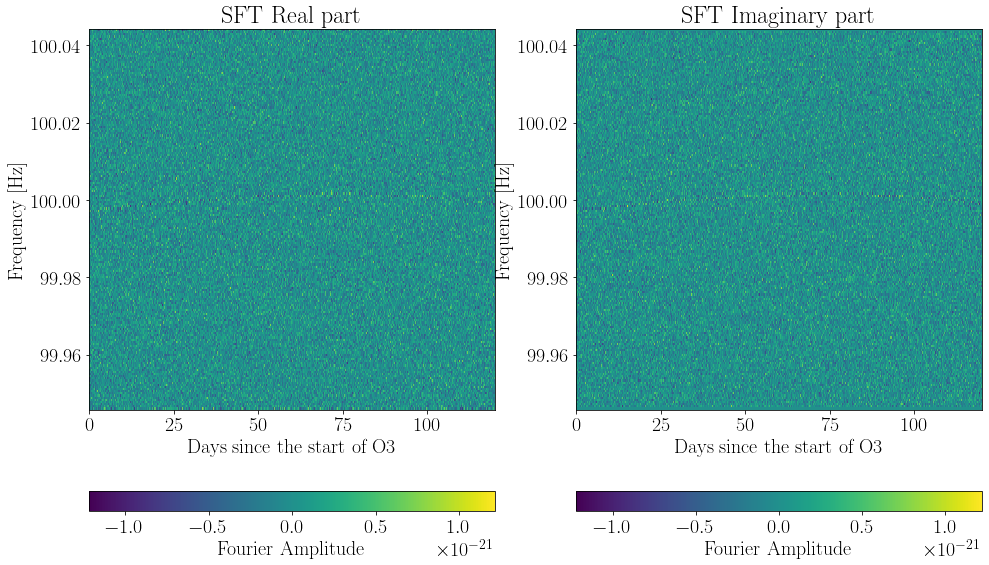

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

for ax in axs:
    ax.set(xlabel="Days since the start of O3", ylabel="Frequency [Hz]")

time_in_days = (timestamps["H1"] - timestamps["H1"][0]) / 86400

axs[0].set_title("SFT Real part")
c = axs[0].pcolormesh(time_in_days, frequency, fourier_data["H1"].real,
                      norm=colors.CenteredNorm())
fig.colorbar(c, ax=axs[0], orientation="horizontal", label="Fourier Amplitude")

axs[1].set_title("SFT Imaginary part")
c = axs[1].pcolormesh(time_in_days, frequency, fourier_data["H1"].imag,
                      norm=colors.CenteredNorm())

fig.colorbar(c, ax=axs[1], orientation="horizontal", label="Fourier Amplitude")

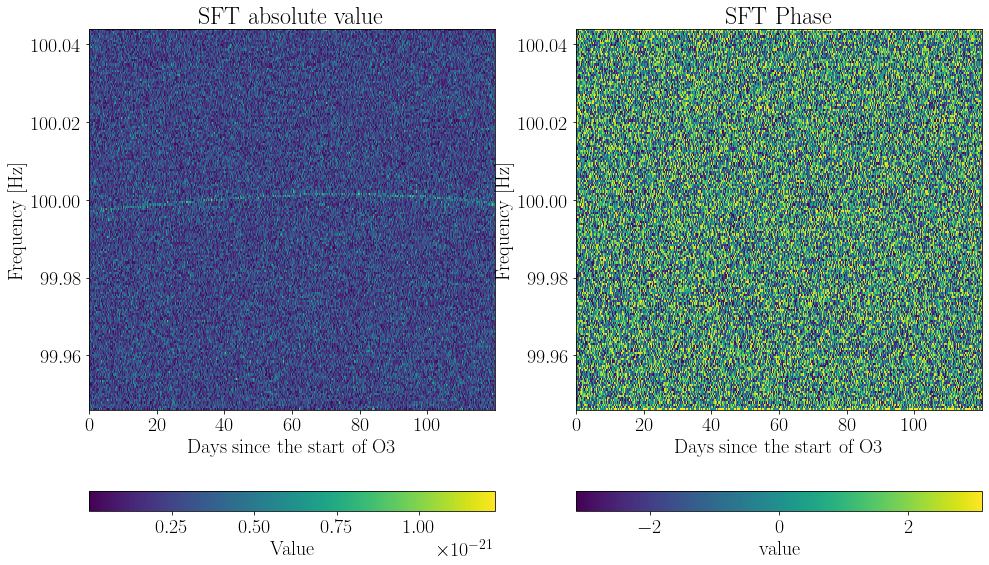

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 10))

for ax in axs:
    ax.set(xlabel="Days since the start of O3", ylabel="Frequency [Hz]")

time_in_days = (timestamps["H1"] - timestamps["H1"][0]) / 86400
     
axs[0].set_title("SFT absolute value")
c = axs[0].pcolorfast(time_in_days, frequency, np.absolute(fourier_data["H1"]))
fig.colorbar(c, ax=axs[0], orientation="horizontal", label="Value")

axs[1].set_title("SFT Phase")
c = axs[1].pcolorfast(time_in_days, frequency, np.angle(fourier_data["H1"]),
                      norm=colors.CenteredNorm())
fig.colorbar(c, ax=axs[1], orientation="horizontal", label="Value")

In [6]:
theta_prior = {
    "F0": {
        "type": "unif",
        "lower": signal_parameters["F0"] - 1e-5,
        "upper": signal_parameters["F0"] + 1e-5,
    },
    "F1": {
        "type": "unif",
        "lower": signal_parameters["F1"] - 1e-11,
        "upper": signal_parameters["F1"] + 1e-11,
    },
    "Alpha": {
        "type": "unif",
        "lower": signal_parameters["Alpha"] - 1e-3,
        "upper": signal_parameters["Alpha"] + 1e-3,
    },
    "Delta": {
        "type": "unif",
        "lower": signal_parameters["Delta"] - 1e-3,
        "upper": signal_parameters["Delta"] + 1e-3,
    },
    "F2": 0.
}

mcmc = pyfstat.MCMCSearch(
    label=writer.label,
    outdir=writer.outdir,
    sftfilepattern=writer.sftfilepath,
    theta_prior=theta_prior,
    tref=writer.tref,
    nsteps=[100, 100],
    nwalkers=100,
    ntemps=3,
)

mcmc.run()
mcmc.plot_corner(add_prior=True, truths=signal_parameters)

16:12 INFO    : Creating MCMCSearch object...
16:12 INFO    : Set-up MCMC search for model single_detector_gaussian_noise
16:12 INFO    : Using data Pyfstat_example_data/H-5760_H1_1800SFT_single_detector_gaussian_noise-1238166018-10368000.sft
16:12 INFO    : theta_prior = {'F0': {'type': 'unif', 'lower': 99.99999, 'upper': 100.00001}, 'F1': {'type': 'unif', 'lower': -1.01e-09, 'upper': -9.9e-10}, 'Alpha': {'type': 'unif', 'lower': 0.499, 'upper': 0.501}, 'Delta': {'type': 'unif', 'lower': -0.001, 'upper': 0.001}, 'F2': 0.0}
16:12 INFO    : nwalkers=100
16:12 INFO    : nsteps = [100, 100]
16:12 INFO    : ntemps = 3
16:12 INFO    : log10beta_min = -5
16:12 INFO    : Setting up search object
16:12 INFO    : Creating ComputeFstat object...
16:12 INFO    : Initialising SFTCatalog from sftfilepattern.
16:12 INFO    : Loading data matching SFT file name pattern 'Pyfstat_example_data/H-5760_H1_1800SFT_single_detector_gaussian_noise-1238166018-10368000.sft' with constraints .
16:12 INFO    : Da

Data timestamps histogram:

  93|  oooooooooooooooooooooooooooooooooooooooooooooooooo
  70|  oooooooooooooooooooooooooooooooooooooooooooooooooo
  47|  oooooooooooooooooooooooooooooooooooooooooooooooooo
  24|  oooooooooooooooooooooooooooooooooooooooooooooooooo
   1| ooooooooooooooooooooooooooooooooooooooooooooooooooo
     ---------------------------------------------------


16:12 INFO    : [minCoverFreq,maxCoverFreq] not provided, trying to estimate from search ranges.
16:12 INFO    : Using minCoverFreq=99.97892465816693 and maxCoverFreq=100.01060477340268.
16:12 INFO    : Initialising FstatInput
16:12 INFO    : Initialising PulsarDoplerParams
16:12 INFO    : Initialising FstatResults
16:12 INFO    : Pickled data outdates sft files
16:12 INFO    : Estimated run-time = 186.91199999999998 s = 3:7 m
16:12 INFO    : Generate initial values from prior dictionary
16:12 INFO    : Checking temperature 0 chains
16:13 INFO    : Checking temperature 1 chains
16:13 INFO    : Checking temperature 2 chains
16:13 INFO    : Running final burn and prod with 200 steps
100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:47<00:00,  4.24it/s]
16:13 INFO    : Mean acceptance fraction: [0.31805 0.33365 0.34055]
16:13 INFO    : Tswap acceptance fraction: [0.00935  0.462875 0.9164  ]
/home/rodrigo/opt/miniconda3/envs/pyfstat/lib/pyth

2022-04-29 16:13:47.5809 (46120) [normal]: Finding all SFTs to load ... done. (found 5760 SFTs)


16:13 INFO    : Plotting temperature 0 chains


2022-04-29 16:13:48.4569 (46120) [normal]: Setting up template grid ... template grid ready.
%% cmdline: /home/rodrigo/opt/miniconda3/envs/pyfstat/bin/lalapps_ComputeFstatistic_v2 --Alpha=0.50000157258245 --Delta=-9.637723347512716e-06 --Freq=99.99999997582495 --f1dot=-9.999956484142812e-10 --f2dot=0 --DataFiles="Pyfstat_example_data/H-5760_H1_1800SFT_single_detector_gaussian_noise-1238166018-10368000.sft" --refTime=1238166018 --outputLoudest="Pyfstat_example_data/single_detector_gaussian_noise.loudest" --minStartTime=1238166018 --maxStartTime=1248534018 --ephemEarth="/home/rodrigo/gravity/venv/pyfstat/share/lalpulsar/earth00-40-DE405.dat.gz" --ephemSun="/home/rodrigo/gravity/venv/pyfstat/share/lalpulsar/sun00-40-DE405.dat.gz"
%% LAL: 7.1.6 (CLEAN 2a94c13d8a2ba99cbdfda5425fbd32fb904cfb46)
%% LALFrame: 1.6.1 (CLEAN 2a94c13d8a2ba99cbdfda5425fbd32fb904cfb46)
%% LALMetaIO: 2.1.1 (CLEAN 2a94c13d8a2ba99cbdfda5425fbd32fb904cfb46)
%% LALSimulation: 3.1.1 (CLEAN 2a94c13d8a2ba99cbdfda5425fbd32fb

16:13 WARNING : Too few points to create valid contours
16:13 WARNING : Too few points to create valid contours
16:13 WARNING : Too few points to create valid contours
16:13 WARNING : Too few points to create valid contours
16:13 WARNING : Too few points to create valid contours
16:13 WARNING : Too few points to create valid contours


Quantiles:
[(0.05, 99.9999993874441), (0.95, 100.0000005760939)]
Quantiles:
[(0.05, -1.0000850447540663e-09), (0.95, -9.999511526939165e-10)]
Quantiles:
[(0.05, 0.49994265538611293), (0.95, 0.500099931812562)]
Quantiles:
[(0.05, -4.963671087465674e-05), (0.95, 6.192455889047304e-05)]


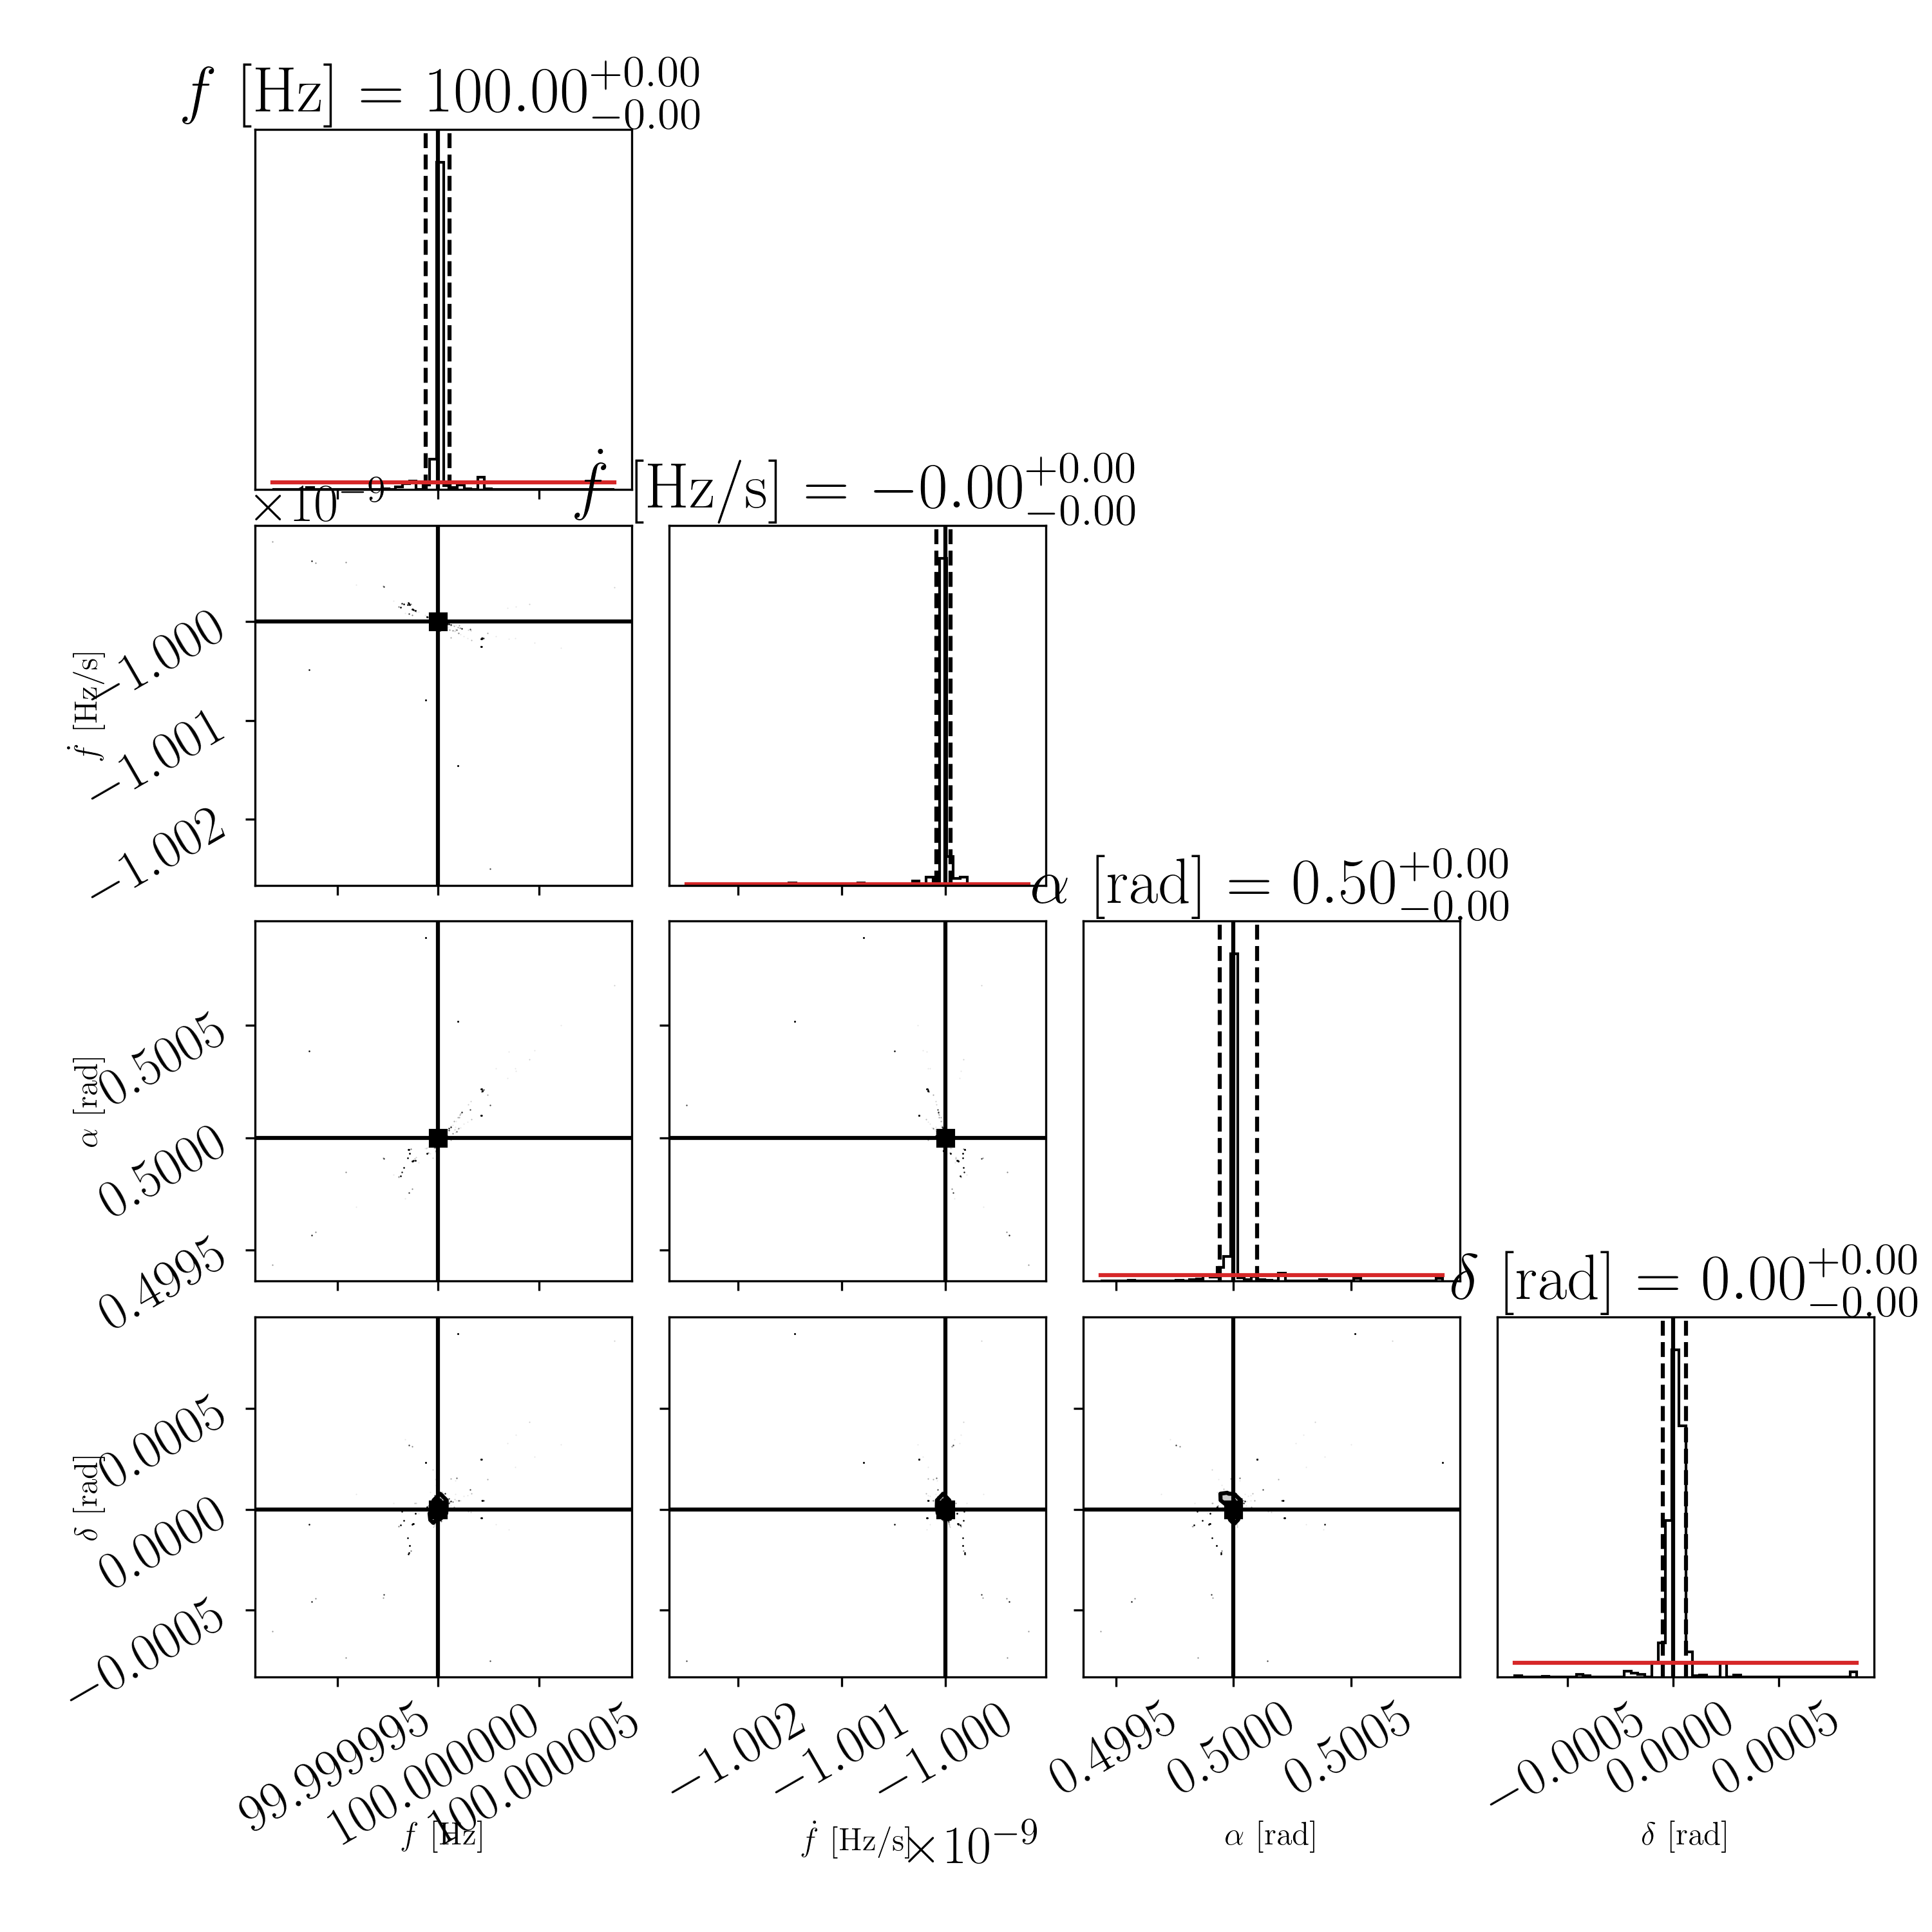

In [7]:
display(Image(filename=f"{mcmc.outdir}/{mcmc.label}_corner.png"))